In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

In [2]:
keras = tf.keras

In [3]:
#devuelve imágenes dígitos escritos a mano en escala de grises 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('x_train', X_train.shape)

x_train (60000, 28, 28)


In [4]:
# una imagen de un solo digito en concreto
# cada valor de pixel tiene un número entre 0 y 255 (escala de 8 bits)
# se puede normalizar a escala 0-1 diviendo entre 256, con eso logramos más eficiencia en el entrenamiento
single_image = X_train[1]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
single_image.shape # es una imagen de 28x28 px

(28, 28)

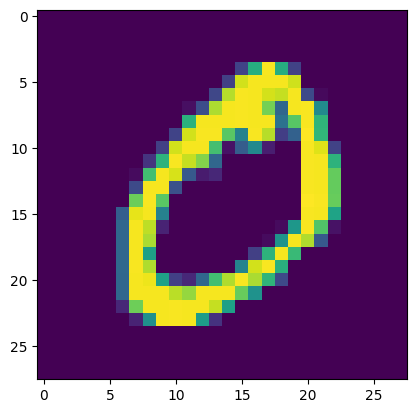

In [6]:
plt.imshow(single_image, cmap='viridis')

In [7]:
y_train # indica el dígito real que hay en la imagen

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# pasamos la salida "y" a one-hot para poder usar métricas de clasificación en el entrenamiento
# hay 10 clases: 0 1 2 3 4 5 6 7 8 9
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)
y_train_onehot[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [ ]:
# opcional: normalizar la entrada X a [0 - 1] para que tarde menos la red neuronal en entrenar
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train[:5]

In [ ]:
# aplanar la entrada manualmente , para que tenga 2D ya que las capas Dense necesitan 2D en la X
# X_train_flatten = X_train.reshape(-1, 28*28)
# X_test_flatten = X_test.reshape(-1, 28*28)
# X_train_flatten[:10]
# alternativa: aplanarla en el modelo con una capa Flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Red neuronal normal

Al aplanar las imágenes 28x28 -> 784, la red pierde información espacial de los píxeles, es decir, no aprovecha la estructura 2D de las imágenes.

In [ ]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Arquitectura
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convierte (28, 28) en (784,) para aplanar la imagen y poder leerla con capas Dense
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # clasificación multiclase con 10 neuronas
])

# Alternativa usando también Sequential pero agregando las capas por separado
# model = keras.Sequential()
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax') )

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        'accuracy',
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
        ]
)


# Opcional: para interrumpir el fit automáticamente si no mejora tras X epochs
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # métrica a revisar para decidir interrumpir el fit
    patience=10, # numero de epochs que tienen que transcurrir sin mejora para interrumpir fit
    mode='min', # 'min' para minimizar el val_loss, 'max' si queremos maximizar
    verbose=1,
    restore_best_weights=True # restaura los mejores pesos del epoch antes de ver que no mejora
)

# entrenar
model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=10, verbose=1, batch_size=32, callbacks=[early_stop]) 

c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8515 - auc: 0.9760 - loss: 0.5337 - precision: 0.9269 - recall: 0.7563 - val_accuracy: 0.9528 - val_auc: 0.9965 - val_loss: 0.1624 - val_precision: 0.9617 - val_recall: 0.9447
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9552 - auc: 0.9971 - loss: 0.1509 - precision: 0.9635 - recall: 0.9475 - val_accuracy: 0.9623 - val_auc: 0.9970 - val_loss: 0.1345 - val_precision: 0.9683 - val_recall: 0.9580
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9690 - auc: 0.9982 - loss: 0.1067 - precision: 0.9741 - recall: 0.9647 - val_accuracy: 0.9649 - val_auc: 0.9972 - val_loss: 0.1235 - val_precision: 0.9694 - val_recall: 0.9613
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9765 - auc: 0.9987 - loss: 0.0814 - precision: 0.9803 - recall: 0.9729 - val_accuracy: 0.9684 - val_auc: 0.9969 - val_loss: 0.1177 - val_precision: 0.9718 - val_recall: 0.9650
Epoch 5/10
1500/1500 ━━━

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,152 (645.13 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,102 (430.09 KB)

In [14]:
df_history = pd.DataFrame(model.history.history)
df_history.head()

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.912917,0.992709,0.308012,0.945123,0.877271,0.952833,0.996546,0.162430,0.961738,0.944667
1,0.957583,0.997309,0.142725,0.965213,0.950896,0.962333,0.996994,0.134494,0.968329,0.958000
2,0.970479,0.998201,0.103162,0.975103,0.966083,0.964917,0.997249,0.123499,0.969412,0.961333
3,0.976542,0.998685,0.079817,0.980053,0.973458,0.968417,0.996935,0.117727,0.971803,0.965000
4,0.981396,0.999070,0.063317,0.984150,0.979208,0.966000,0.996863,0.120310,0.968360,0.964083


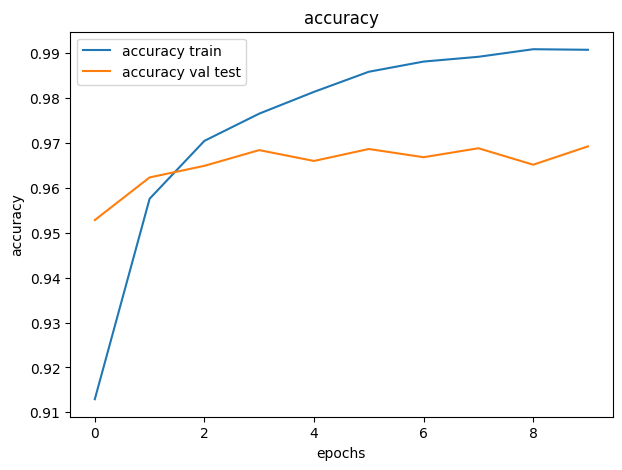

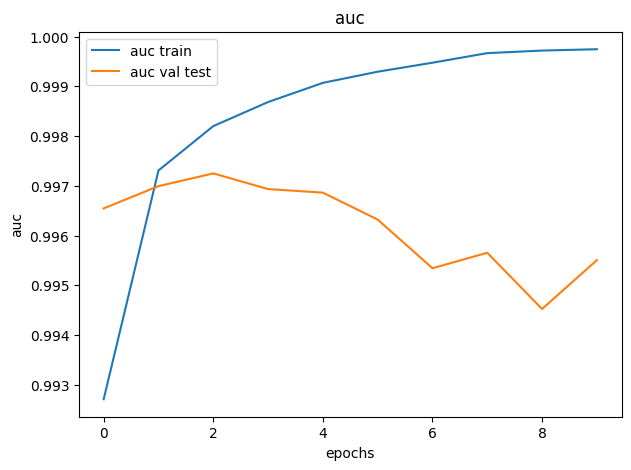

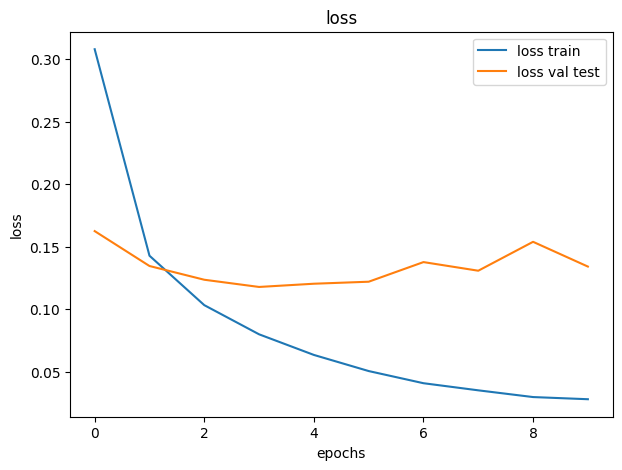

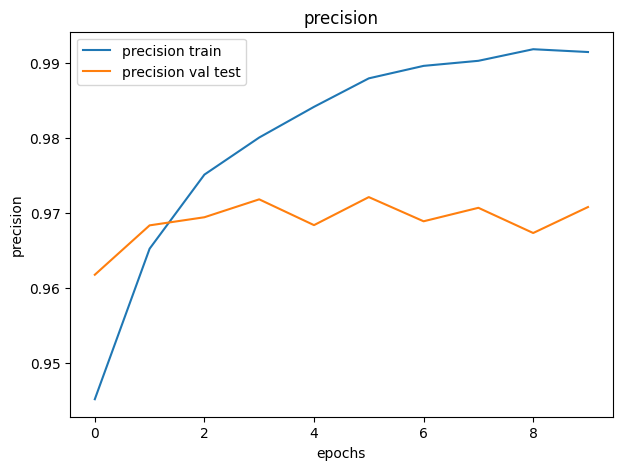

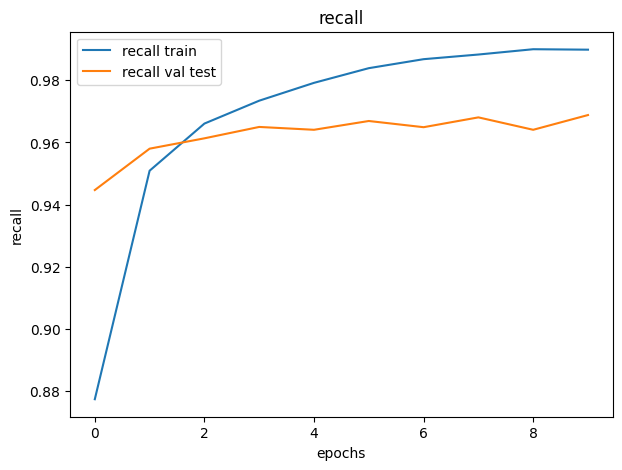

In [15]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_history)

In [17]:
model.predict(X_test)[:5] # probabilidades

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.30393147e-07, 7.76449660e-09, 6.37956618e-05, 2.35291183e-04,
        3.29171196e-12, 6.29647730e-08, 1.71107188e-13, 9.99700546e-01,
        6.58660468e-08, 1.56653954e-07],
       [1.73480430e-07, 7.81357303e-05, 9.99724925e-01, 1.10847344e-04,
        1.08617804e-09, 6.02752261e-05, 1.34866987e-05, 4.81158535e-09,
        1.20763552e-05, 1.23039317e-12],
       [6.26301335e-06, 9.77540672e-01, 1.12225791e-03, 3.26847257e-05,
        7.65689838e-05, 1.62096439e-05, 2.55516090e-04, 2.06145551e-02,
        3.33997159e-04, 1.29991838e-06],
       [9.99640346e-01, 2.72496709e-06, 2.58113054e-04, 4.90822786e-05,
        1.33277024e-06, 2.75881121e-06, 6.48743890e-06, 2.67217856e-05,
        1.07450633e-05, 1.71740919e-06],
       [1.51593949e-05, 6.46680855e-05, 2.98504347e-07, 1.24940726e-07,
        9.97949183e-01, 9.52977246e-07, 4.72423653e-06, 2.08763595e-05,
        2.99138537e-06, 1.94106053e-03]], dtype=float32)

In [22]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, 0, 4])

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.93      0.98      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [26]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred})
df_comparison.head()

,real,prediccion
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


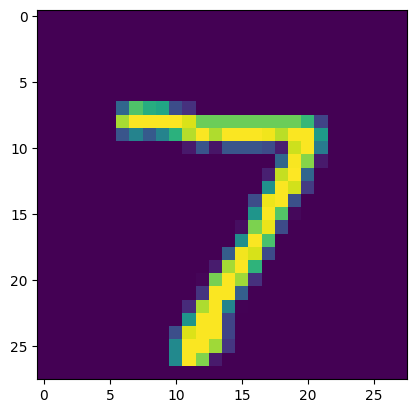

In [28]:
plt.imshow(X_test[0].reshape(28,28), cmap='viridis')

In [37]:
X_test.shape

(10000, 28, 28)

In [41]:
X_test[0].shape

(28, 28)

In [42]:
# pasar una imagen a 3D para que luego el Flatten haga su trabajo
image_to_predict = X_test[0].reshape(1, 28, 28)
image_to_predict.shape

(1, 28, 28)

In [43]:
# hacer una prediccion
model.predict(image_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[1.3039340e-07, 7.7644966e-09, 6.3795727e-05, 2.3529118e-04,
        3.2917308e-12, 6.2964894e-08, 1.7110785e-13, 9.9970055e-01,
        6.5866175e-08, 1.5665441e-07]], dtype=float32)

In [ ]:
np.argmax(model.predict(image_to_predict), axis=1) #el modelo predice que la imagen es el número 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([7])

## Red neuronal de convolución: CNN

* ``Conv2D``:
    * ``filters``: 
        * indica el número de filtros (o kernels) que se aplican en la capa convolucional. Cada filtro extrae un tipo de característica o patrón diferente de la imagen (bordes verticales, horizontales, texturas específicas, etc.).
        * Regla general: Se suele empezar con un número relativamente bajo de filtros (por ejemplo, 16 o 32) en las primeras capas y aumentar en capas posteriores (64, 128, 256, ...).  
        * A mayor número de filtros, la red puede aprender características más variadas, pero también aumenta el número de parámetros y el costo computacional.
    * ``kernel_size``:
        * determina el tamaño del filtro (o ventana) que se va a desplazar sobre la imagen para extraer características. Por ejemplo, kernel_size=(3,3) significa que cada filtro es de 3×3 píxeles.
        * Regla general: valores pequeños como (3,3) o (5,5) suelen ser los más utilizados.
        * Kernel grande (por ejemplo, 7×7, 11×11): cubre más área en una sola convolución, pero a veces aprende características demasiado globales de la imagen.
        * Kernel pequeño (3×3): fuerza a la red a aprender rasgos locales (pequeños bordes, esquinas), y apilando varias capas convolucionales se capturan patrones más complejos.
        * (3,3) es prácticamente un estándar en muchas arquitecturas modernas (VGG, ResNet, etc.).
* ``MaxPooling2D``:
    * En el concepto de pooling o agrupamiento, vamos a tomar grupos de píxeles (por ejemplo, grupos de 2x2 píxeles) y realizar una agregación sobre ellos. 
    * Una de las posibles agregaciones que podemos hacer es tomar el valor máximo de los píxeles del grupo (esto se conoce como Max Pooling). Otra agregación común es tomar el promedio (Average Pooling).
    * ``pool_size``: 
        * es el tamaño (alto × ancho) de la ventana con la que se hace la operación de pooling (por ejemplo, pool_size=(2,2) significa que cada “región” de 2×2 se resumirá en un único valor, típicamente el máximo —max pooling—).
        * Regla general: (2,2) se usa a menudo para reducir a la mitad el tamaño espacial (altura y ancho) de la representación después de cada bloque convolucional.
        * Reduce la dimensionalidad: disminuye el número de parámetros de las capas siguientes y la memoria requerida.
        * Introduce cierta invariancia a pequeñas traslaciones (si el objeto o característica se mueve un poco dentro de ese 2×2, el resultado tras el pooling no cambia).
        * Cuidado: un pool_size demasiado grande reduce la imagen muy rápido y puede perder detalles importantes.

* ``Flatten()``:
    * toma una entrada con forma (por ejemplo) [batch_size, altura, anchura, canales] y la aplana en [batch_size, altura*anchura*canales].
    * Convierte el mapa de características 2D o 3D que sale de la última capa convolucional en un vector 1D, para poder conectarlo con capas totalmente conectadas (Dense).
    * se utiliza justo antes de capas densas (fully connected), porque Dense espera una entrada en forma de vector.
    * Entrada: un tensor con dimensiones [batch_size, alto, ancho, canales].
    * Salida: un tensor con dimensiones [batch_size, alto × ancho × canales].

* padding:
    * Es la práctica de “rellenar” (o “padear”) los bordes de la imagen (o del mapa de características) con valores, por lo general ceros, antes de aplicar la operación de convolución.
    * Visualmente, si tienes una matriz de entrada 5×5 y haces un padding de 1 píxel alrededor, la entrada efectiva se vuelve 7×7 (agregas 1 fila de ceros en la parte superior, 1 fila de ceros en la parte inferior, 1 columna de ceros a la izquierda y 1 columna de ceros a la derecha).
    * ¿Por qué usarlo?
        * Sin padding, la convolución en los bordes se realiza con menos valores que en el centro, perdiendo información cerca de los bordes de la imagen.
        * Con padding, la convolución dispone de información más completa para cada posición.
        * Con padding apropiado, se puede mantener el mismo tamaño de la entrada en la salida, algo llamado comúnmente “same padding”.
    * ejemplo: ``layers.Conv2D(filters=32, kernel_size=(3,3), padding='same')``
    * valid (sin padding) y same (con padding para conservar dimensiones).
    * Por defecto es padding = 'valid' por lo que sí se reduce un poco la entrada.


Ventajas:

* La CNN utiliza capas convolucionales y de pooling para extraer características locales (bordes, texturas) antes de combinar la información en la parte final de la red.
* Esto permite una mejor generalización y un número de parámetros menor que un MLP de arquitectura equivalente en profundidad, gracias a la “compartición de pesos” y los “campos receptivos locales”.
* Menor número de parámetros gracias al uso de kernels compartidos.
* Explotación de la estructura espacial: los filtros “ven” pequeñas regiones (3×3, 5×5, etc.) y pueden reconocer patrones sin perder información espacial.
* Invarianza a traslaciones: el mismo filtro se desplaza por toda la imagen.

In [ ]:
X_train.shape # 3D, pero necesitamos 4D para la CNN

(60000, 28, 28)

In [ ]:
# Redimensionar X para CNN ( canal de color = 1) 4D
# num_samples, 28, 28, 1 canal de color (1 para escala de grises o 3 para RGB)
# Las capas CNN esperan entradas en formato 4D (batch_size, height, width, channels)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
X_train_cnn.shape

(60000, 28, 28, 1)

In [ ]:
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Arquitectura
model = keras.Sequential([
    #primera capa convolucional
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(), # aplanado
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # clasificación multiclase con 10 neuronas
])

# Alternativa usando también Sequential pero agregando las capas por separado
# model = keras.Sequential()
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax') )

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        'accuracy',
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
        ]
)


# Opcional: para interrumpir el fit automáticamente si no mejora tras X epochs
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # métrica a revisar para decidir interrumpir el fit
    patience=10, # numero de epochs que tienen que transcurrir sin mejora para interrumpir fit
    mode='min', # 'min' para minimizar el val_loss, 'max' si queremos maximizar
    verbose=1,
    restore_best_weights=True # restaura los mejores pesos del epoch antes de ver que no mejora
)

# entrenar
model.fit(X_train_cnn, y_train_onehot, validation_split=0.2, epochs=10, verbose=1, batch_size=32, callbacks=[early_stop]) 